In [1]:
import numpy as np
import pandas as pd
import datetime

import pytest

from Outcomes import outcomes
from SEIR.utils import config



import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import glob, os, sys
from pathlib import Path
#import seaborn as sns
import pyarrow.parquet as pq
import click
import pyarrow as pa

import os


In [2]:
hpar_fn = 'model_output/hpar/testInference/test/med/N50_npis-sd01_conf-sd01_lc-sqrtnorm-001_ld-sqrtnorm-001_test/global/intermediate/000000002.000000001.000000004.N50_npis-sd01_conf-sd01_lc-sqrtnorm-001_ld-sqrtnorm-001_test.hpar.parquet'
hpar =  pq.read_table(hpar_fn).to_pandas()
delay = int(list(hpar[(hpar['outcome']=='incidC') & (hpar['quantity'] == 'delay')].value)[0])
vals = list(hpar[(hpar['outcome']=='incidC') & (hpar['quantity'] == 'probability')].value)
hospf=  pq.read_table(hpar_fn.replace('hpar', 'hosp')).to_pandas()
seirf = pq.read_table(hpar_fn.replace('hpar', 'seir')).to_pandas()
seirf=seirf[seirf['comp'] == 'diffI']
places = seirf.drop(['comp', 'time'], axis =1).columns
seirf.set_index('time', drop=True, inplace=True)
i = 1
geoid = places[i]
seir = seirf[geoid]
hosp = hospf[hospf['geoid'] == geoid]
hosp.set_index('time', drop=True, inplace=True)
hosp = hosp['incidC']
fig, ax = plt.subplots(1,2, figsize = (10,5), sharex = True)
ax[0].plot(hosp.shift(-7), c = 'r')
ax[0].plot(seir, c = 'b')
ax[1].set_title(vals[i])
ax[1].plot(hosp.shift(-delay)/seir, linestyle = '-.',lw =6)

OSError: Passed non-file path: model_output/hpar/testInference/test/med/N50_npis-sd01_conf-sd01_lc-sqrtnorm-001_ld-sqrtnorm-001_test/global/intermediate/000000002.000000001.000000004.N50_npis-sd01_conf-sd01_lc-sqrtnorm-001_ld-sqrtnorm-001_test.hpar.parquet

In [10]:
for i in range(len(vals)):
    geoid = places[i]
    seir = seirf[geoid]
    hosp = hospf[hospf['geoid'] == geoid]
    hosp.set_index('time', drop=True, inplace=True)
    hosp = hosp['incidC']
    #print((hosp.shift(-delay)/seir).mean() - vals[i], end= ' ... ')
    ratiodiff = (hosp.shift(-delay)/seir).mean() - vals[i]
    if(ratiodiff > 1e-5):
        print('ERROR')
    elif(np.isnan(ratiodiff)):
        print('nan')

In [32]:
hpar_fn = 'model_output/hpar/testInference/test/med/N50_npis-sd01_conf-sd01_lc-sqrtnorm-001_ld-sqrtnorm-001_test/global/intermediate/000000002.000000001.000000001.N50_npis-sd01_conf-sd01_lc-sqrtnorm-001_ld-sqrtnorm-001_test.hpar.parquet'
hpar =  pq.read_table(hpar_fn).to_pandas()
hpar_old =  pq.read_table(hpar_fn.replace('hpar', 'hpar-old')).to_pandas()

In [39]:
(hpar[(hpar['outcome']=='incidC') & (hpar['quantity'] == 'probability')]['value'] == hpar_old[(hpar_old['outcome']=='incidC') & (hpar_old['quantity'] == 'probability')]['value']).all()

True

550    0.482694
551    0.900042
552    0.649279
553    0.757590
554    0.644361
555    0.852066
556    0.583065
557    0.614878
558    0.504400
559    0.555074
560    0.701509
561    0.744518
562    0.709135
563    0.559529
564    0.426426
565    0.577619
566    0.429323
567    0.554527
568    0.617109
569    0.636135
570    0.913687
571    0.423127
572    0.857328
573    0.755145
574    0.928433
575    0.515603
576    0.553236
577    0.230400
578    0.577938
579    0.560951
580    0.602165
581    0.682359
582    0.404832
583    0.388741
584    0.415768
585    0.558983
586    0.533136
587    0.431176
588    0.811614
589    0.744674
590    0.718128
591    0.595315
592    0.475657
593    0.715295
594    0.308053
595    0.622003
596    0.260189
597    0.512648
598    0.693008
599    0.372173
Name: value, dtype: float64

In [61]:
for i in range(len(vals)):
    geoid = places[i]
    seir = seirf[geoid]
    hosp = hospf[hospf['geoid'] == geoid]
    hosp.set_index('time', drop=True, inplace=True)
    hosp = hosp['incidC']
    print((hosp.shift(-delay)/seir).mean() - vals[i], end= ' ... ')


1.1102230246251565e-16 ... -5.551115123125783e-17 ... 0.0 ... nan ... 5.551115123125783e-17 ... -5.551115123125783e-17 ... nan ... 0.0 ... -1.1102230246251565e-16 ... 0.0 ... 5.551115123125783e-17 ... -2.220446049250313e-16 ... 1.1102230246251565e-16 ... 5.551115123125783e-17 ... 0.0 ... 5.551115123125783e-17 ... 3.469446951953614e-18 ... 0.0 ... 0.0 ... -1.1102230246251565e-16 ... -1.1102230246251565e-16 ... 1.1102230246251565e-16 ... 0.0 ... 2.7755575615628914e-17 ... 1.1102230246251565e-16 ... -1.1102230246251565e-16 ... -2.7755575615628914e-17 ... 0.0 ... -5.551115123125783e-17 ... -1.3877787807814457e-17 ... 0.0 ... 0.0 ... 0.0 ... 0.0 ... 0.0 ... 5.551115123125783e-17 ... 0.0 ... 1.1102230246251565e-16 ... 1.1102230246251565e-16 ... -1.1102230246251565e-16 ... 0.0 ... 1.1102230246251565e-16 ... -1.1102230246251565e-16 ... -2.7755575615628914e-17 ... 0.0 ... 0.0 ... 1.3877787807814457e-17 ... -2.220446049250313e-16 ... -2.7755575615628914e-17 ... -1.1102230246251565e-16 ... 

### Creating a test file from the inference test:

In [66]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import glob, os, sys
from pathlib import Path
#import seaborn as sns
import matplotlib._color_data as mcd
import pyarrow.parquet as pq
import click

import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.backends.backend_pdf import PdfPages

folder = [x for x in Path('model_output/hpar/testInference/test/med/N50_npis-sd01_conf-sd01_lc-sqrtnorm-001_ld-sqrtnorm-001_test/').glob('**') if not x.is_file()]

folder.reverse()

all_hosp_sim = {}

for fold in folder:
    print(fold)
    data = []
    print(f'Exploring {str(fold)[:]} ... ', end = '')
    files_loaded = 0
    for hpar_fn in Path(str(fold)).rglob('*.parquet'):
        hpar_fn = str(hpar_fn)
        if ('chimeric' not in hpar_fn):
            hpar =  pq.read_table(hpar_fn).to_pandas()
            delay = int(list(hpar[(hpar['outcome']=='incidC') & (hpar['quantity'] == 'delay')].value)[0])
            vals = list(hpar[(hpar['outcome']=='incidC') & (hpar['quantity'] == 'probability')].value)
            hospf = pq.read_table(hpar_fn.replace('hpar', 'hosp')).to_pandas()
            seirf = pq.read_table(hpar_fn.replace('hpar', 'seir')).to_pandas()
            seirf = seirf[seirf['comp'] == 'diffI']
            places = seirf.drop(['comp', 'time'], axis =1).columns
            seirf.set_index('time', drop=True, inplace=True)
            files_loaded += 1
            error = False
            badNaN = False
            for i in range(len(vals)):
                geoid = places[i]
                seir = seirf[geoid]
                hosp = hospf[hospf['geoid'] == geoid]
                hosp.set_index('time', drop=True, inplace=True)
                hosp = hosp['incidC']
                ratiodiff = (hosp.shift(-delay)/seir).mean() - vals[i]
                if(ratiodiff > 1e-5):
                    error = True
                if(np.isnan(ratiodiff) and (seir != 0).all()):
                    badNaN = True
            if error:
                print('ERROR :', hpar_fn)
            if badNaN:
                print('Strange NaN', hpar_fn)
            
            if 'intermediate' in hpar_fn and len(hpar_fn) > 216 :  #global files are not duplicated with the read-write code. 216 so we don't have file that don't have last number, because not outputed.
                hpar_old =  pq.read_table(hpar_fn.replace('hpar', 'hpar-old')).to_pandas()
                if ((hpar[(hpar['outcome']=='incidC') & (hpar['quantity'] == 'probability')]['value'] == hpar_old[(hpar_old['outcome']=='incidC') & (hpar_old['quantity'] == 'probability')]['value']).all() == False):
                    print('rewrite error', hpar_fn)

    print(files_loaded, 'files read')

model_output/hpar/testInference/test/med/N50_npis-sd01_conf-sd01_lc-sqrtnorm-001_ld-sqrtnorm-001_test/chimeric/intermediate
Exploring model_output/hpar/testInference/test/med/N50_npis-sd01_conf-sd01_lc-sqrtnorm-001_ld-sqrtnorm-001_test/chimeric/intermediate ... 0 files read
model_output/hpar/testInference/test/med/N50_npis-sd01_conf-sd01_lc-sqrtnorm-001_ld-sqrtnorm-001_test/chimeric
Exploring model_output/hpar/testInference/test/med/N50_npis-sd01_conf-sd01_lc-sqrtnorm-001_ld-sqrtnorm-001_test/chimeric ... 0 files read
model_output/hpar/testInference/test/med/N50_npis-sd01_conf-sd01_lc-sqrtnorm-001_ld-sqrtnorm-001_test/global/intermediate
Exploring model_output/hpar/testInference/test/med/N50_npis-sd01_conf-sd01_lc-sqrtnorm-001_ld-sqrtnorm-001_test/global/intermediate ... 7600 files read
model_output/hpar/testInference/test/med/N50_npis-sd01_conf-sd01_lc-sqrtnorm-001_ld-sqrtnorm-001_test/global/final
Exploring model_output/hpar/testInference/test/med/N50_npis-sd01_conf-sd01_lc-sqrtnorm-

KeyboardInterrupt: 

In [67]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import glob, os, sys
from pathlib import Path
#import seaborn as sns
import matplotlib._color_data as mcd
import pyarrow.parquet as pq
import click

import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.backends.backend_pdf import PdfPages

folder = [x for x in Path('model_output/hpar/testInference/test/med/N50_npis-sd01_conf-sd01_lc-sqrtnorm-001_ld-sqrtnorm-001_test/global/final/').glob('**') if not x.is_file()]

folder.reverse()

all_hosp_sim = {}


all_vals = []
for fold in folder:
    print(fold)
    data = []
    print(f'Exploring {str(fold)[:]} ... ', end = '')
    files_loaded = 0
    for hpar_fn in Path(str(fold)).rglob('*.parquet'):
        hpar_fn = str(hpar_fn)
        if ('chimeric' not in hpar_fn):
            hpar =  pq.read_table(hpar_fn).to_pandas()
            delay = int(list(hpar[(hpar['outcome']=='incidC') & (hpar['quantity'] == 'delay')].value)[0])
            vals = list(hpar[(hpar['outcome']=='incidC') & (hpar['quantity'] == 'probability')].value)
            hospf = pq.read_table(hpar_fn.replace('hpar', 'hosp')).to_pandas()
            seirf = pq.read_table(hpar_fn.replace('hpar', 'seir')).to_pandas()
            seirf = seirf[seirf['comp'] == 'diffI']
            places = seirf.drop(['comp', 'time'], axis =1).columns
            seirf.set_index('time', drop=True, inplace=True)
            files_loaded += 1
            all_vals = all_vals+vals

    print(files_loaded, 'files read')

model_output/hpar/testInference/test/med/N50_npis-sd01_conf-sd01_lc-sqrtnorm-001_ld-sqrtnorm-001_test/global/final
Exploring model_output/hpar/testInference/test/med/N50_npis-sd01_conf-sd01_lc-sqrtnorm-001_ld-sqrtnorm-001_test/global/final ... 50 files read


In [69]:
all_vals = np.array(all_vals)

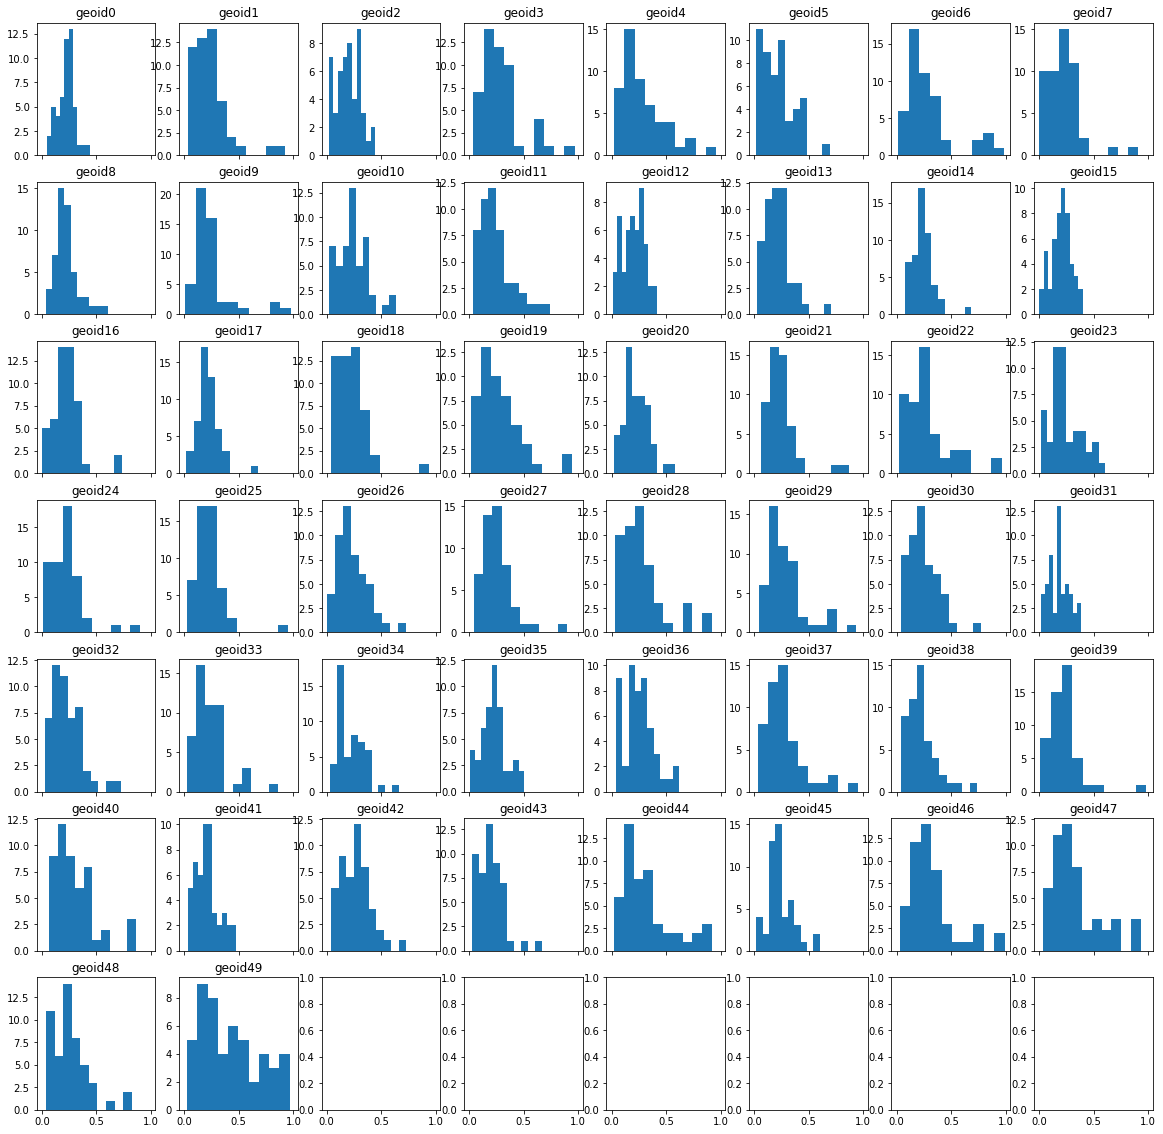

In [82]:
fig, ax = plt.subplots(7,8, figsize = (20,20), sharex = True)
for i in range(50):
    ax.flat[i].hist(all_vals[i::50])
    ax.flat[i].set_title('geoid' + str(i))